# Trees and Graphs
**Trees vs. Binary Trees**
A binary tree is a tree in which each node has up to two children . Not all trees are binary trees. For example,
this tree is not a binary tree. You could call it a ternary tree.

**Binary Tree vs. Binary Search Tree**
A binary search tree is a binary tree in which every node fits a specific ordering property: a left descendents <= n < all right descendents.This must be true for each node n.

**Balanced vs. Unbalanced**
Note that balancing a tree does not mean the left and right subtrees are exactly the same size.One way to think about it is that a "balanced" tree really means something more like "not terribly imbalanced:'It's balanced enough to ensure O(log n) times for insert and find,but it's not necessarily as balanced as it could be.

**Complete Binary Trees**
A complete binary tree is a binary tree in which every level of the tree is fully filled, except for perhaps the
last level. To the extent that the last level is filled, it is filled left to right.

**Full Binary Trees**
A full binary tree is a binary tree in which every node has either zero or two children.That is, no nodes have
only one child.

**Perfect Binary Trees**
A perfect binary tree is one that is both full and complete. All leaf nodes will be at the same level, and this
level has the maximum number of nodes.

**In-Order Traversal**
In-order traversal means to "visit" (often, print) the left branch, then the current node, and finally, the right branch.
Pre-Order Traversal
Pre-order traversal visits the current node before its child nodes (hence the name "pre-order").
Post-Order Traversal
Post-order traversal visits the current node after its child nodes (hence the name "post-order").

**Binary Heaps (Min-Heaps and Max-Heaps)**
We'll just discuss min-heaps here. Max-heaps are essentially equivalent, but the elements are in descending order rather than ascending order.

A min-heap is a complete binary tree (that is, totally filled other than the rightmost elements on the last level) where each node is smaller than its children. The root, therefore, is the minimum element in the tree

We have two key operations on a min-heap: insert and extract_min. Insert
When we insert into a min-heap, we always start by inserting the element at the bottom.We insert at the rightmost spot so as to maintain the complete tree property.

Then, we "fix" the tree by swapping the new element with its parent, until we find an appropriate spot for the element. We essentially bubble up the minimum element.


In [4]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.data,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.data)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def pre_order(node):
    if not isinstance(node, TreeNode) or not node:
        return
    print(node.data, end=" ")
    pre_order(node.left)
    pre_order(node.right)


def in_order(node):
    if not isinstance(node, TreeNode) or not node:
        return
    in_order(node.left)
    print(node.data, end=" ")
    in_order(node.right)


def post_order(node):
    if not isinstance(node, TreeNode) or not node:
        return
    post_order(node.left)
    post_order(node.right)
    print(node.data, end=" ")


def level_order(node):
    if not isinstance(node, TreeNode) or not node:
        return
    q = queue.Queue()
    q.put(node)
    while not q.empty():
        node_dequeued = q.get()
        print(node_dequeued.data, end=" ")
        if node_dequeued.left:
            q.put(node_dequeued.left)
        if node_dequeued.right:
            q.put(node_dequeued.right)

from collections import deque
def levelOrderPrint(tree):
    if tree is None:
        return

    queue = deque()
    queue.append(tree)
    while len(queue) != 0:
        temp = deque()
        while len(queue) != 0:
            node = queue.pop()
            print(str(node.val) + ' ')
            if node.left is not None:
                temp.append(tree.left)
            if node.right is not None:
                temp.append(tree.right)
            queue = temp
            
def level_order_actual(node):
    if not isinstance(node, TreeNode) or not node:
        return
    q = queue.Queue()
    q.put(node)
    while not q.empty():
        list = []
        while not q.empty():
            node_dequeued = q.get()
            print(node_dequeued.data, end=" ")
            if node_dequeued.left:
                list.append(node_dequeued.left)
            if node_dequeued.right:
                list.append(node_dequeued.right)
        print()
        for node in list:
            q.put(node)


# iteration version
def pre_order_iter(node):
    if not isinstance(node, TreeNode) or not node:
        return
    stack = []
    n = node
    while n or stack:
        while n:  # start from root node, find its left child
            print(n.data, end=" ")
            stack.append(n)
            n = n.left
        # end of while means current node doesn't have left child
        n = stack.pop()
        # start to traverse its right child
        n = n.right


def in_order_iter(node):
    if not isinstance(node, TreeNode) or not node:
        return
    stack = []
    n = node
    while n or stack:
        while n:
            stack.append(n)
            n = n.left
        n = stack.pop()
        print(n.data, end=" ")
        n = n.right


def post_order_iter(node):
    if not isinstance(node, TreeNode) or not node:
        return
    stack1, stack2 = [], []
    n = node
    stack1.append(n)
    while stack1:  # to find the reversed order of post order, store it in stack2
        n = stack1.pop()
        if n.left:
            stack1.append(n.left)
        if n.right:
            stack1.append(n.right)
        stack2.append(n)
    while stack2:  # pop up from stack2 will be the post order
        print(stack2.pop().data, end=" ")

tree1 = TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)),TreeNode(5,None,TreeNode(6)))
print(str(tree1))
in_order(tree1)
pre_order_iter(tree1)

(1(2(3..)(4..))(5.(6..)))
3 2 4 1 5 6 1 2 3 4 5 6 

## Graph BFS, DFS

In [ ]:
class Graph():
    def __init__(self):
        self.vertex = {}

    # for printing the Graph vertexes
    def printGraph(self):
        for i in self.vertex.keys():
            print(i,' -> ', ' -> '.join([str(j) for j in self.vertex[i]]))

    # for adding the edge beween two vertexes
    def addEdge(self, fromVertex, toVertex):
        # check if vertex is already present,
        if fromVertex in self.vertex.keys():
            self.vertex[fromVertex].append(toVertex)
        else:
            # else make a new vertex
            self.vertex[fromVertex] = [toVertex]

    def BFS(self, startVertex):
        # Take a list for stoting already visited vertexes
        visited = [False] * len(self.vertex)

        # create a list to store all the vertexes for BFS
        queue = []

        # mark the source node as visited and enqueue it
        visited[startVertex] = True
        queue.append(startVertex)

        while queue:
            startVertex = queue.pop(0)
            print(startVertex, end = ' ')

            # mark all adjacent nodes as visited and print them
            for i in self.vertex[startVertex]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True
    
    def DFS(self):
        # visited array for storing already visited nodes
        visited = [False] * len(self.vertex)

        # call the recursive helper function
        for i in range(len(self.vertex)):
            if visited[i] == False:
                self.DFSRec(i, visited)

    def DFSRec(self, startVertex, visited):
        # mark start vertex as visited
        visited[startVertex] = True

        print(startVertex, end = ' ')

        # Recur for all the vertexes that are adjacent to this node
        for i in self.vertex.keys():
            if visited[i] == False:
                self.DFSRec(i, visited)

if __name__ == '__main__':
    g = Graph()
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    g.printGraph()
    print('BFS:')
    g.BFS(2)

## basic_graphs

In [ ]:
# Accept No. of Nodes and edges
n, m = map(int, raw_input().split(" "))

# Initialising Dictionary of edges
g = {}
for i in xrange(n):
    g[i + 1] = []

"""
--------------------------------------------------------------------------------
    Accepting edges of Unweighted Directed Graphs
--------------------------------------------------------------------------------
"""
for _ in xrange(m):
    x, y = map(int, raw_input().split(" "))
    g[x].append(y)

"""
--------------------------------------------------------------------------------
    Accepting edges of Unweighted Undirected Graphs
--------------------------------------------------------------------------------
"""
for _ in xrange(m):
    x, y = map(int, raw_input().split(" "))
    g[x].append(y)
    g[y].append(x)

"""
--------------------------------------------------------------------------------
    Accepting edges of Weighted Undirected Graphs
--------------------------------------------------------------------------------
"""
for _ in xrange(m):
    x, y, r = map(int, raw_input().split(" "))
    g[x].append([y, r])
    g[y].append([x, r])

"""
--------------------------------------------------------------------------------
    Depth First Search.
        Args :  G - Dictionary of edges
                s - Starting Node
        Vars :  vis - Set of visited nodes
                S - Traversal Stack
--------------------------------------------------------------------------------
"""


def dfs(G, s):
    vis, S = set([s]), [s]
    print(s)
    while S:
        flag = 0
        for i in G[S[-1]]:
            if i not in vis:
                S.append(i)
                vis.add(i)
                flag = 1
                print(i)
                break
        if not flag:
            S.pop()


"""
--------------------------------------------------------------------------------
    Breadth First Search.
        Args :  G - Dictionary of edges
                s - Starting Node
        Vars :  vis - Set of visited nodes
                Q - Traveral Stack
--------------------------------------------------------------------------------
"""
from collections import deque


def bfs(G, s):
    vis, Q = set([s]), deque([s])
    print(s)
    while Q:
        u = Q.popleft()
        for v in G[u]:
            if v not in vis:
                vis.add(v)
                Q.append(v)
                print(v)


"""
--------------------------------------------------------------------------------
    Dijkstra's shortest path Algorithm
        Args :  G - Dictionary of edges
                s - Starting Node
        Vars :  dist - Dictionary storing shortest distance from s to every other node
                known - Set of knows nodes
                path - Preceding node in path
--------------------------------------------------------------------------------
"""


def dijk(G, s):
    dist, known, path = {s: 0}, set(), {s: 0}
    while True:
        if len(known) == len(G) - 1:
            break
        mini = 100000
        for i in dist:
            if i not in known and dist[i] < mini:
                mini = dist[i]
                u = i
        known.add(u)
        for v in G[u]:
            if v[0] not in known:
                if dist[u] + v[1] < dist.get(v[0], 100000):
                    dist[v[0]] = dist[u] + v[1]
                    path[v[0]] = u
    for i in dist:
        if i != s:
            print(dist[i])


"""
--------------------------------------------------------------------------------
    Topological Sort
--------------------------------------------------------------------------------
"""
from collections import deque


def topo(G, ind=None, Q=[1]):
    if ind is None:
        ind = [0] * (len(G) + 1)  # SInce oth Index is ignored
        for u in G:
            for v in G[u]:
                ind[v] += 1
        Q = deque()
        for i in G:
            if ind[i] == 0:
                Q.append(i)
    if len(Q) == 0:
        return
    v = Q.popleft()
    print(v)
    for w in G[v]:
        ind[w] -= 1
        if ind[w] == 0:
            Q.append(w)
    topo(G, ind, Q)


"""
--------------------------------------------------------------------------------
    Reading an Adjacency matrix
--------------------------------------------------------------------------------
"""


def adjm():
    n, a = raw_input(), []
    for i in xrange(n):
        a.append(map(int, raw_input().split()))
    return a, n


"""
--------------------------------------------------------------------------------
    Floyd Warshall's algorithm
        Args :  G - Dictionary of edges
                s - Starting Node
        Vars :  dist - Dictionary storing shortest distance from s to every other node
                known - Set of knows nodes
                path - Preceding node in path
--------------------------------------------------------------------------------
"""


def floy(A_and_n):
    (A, n) = A_and_n
    dist = list(A)
    path = [[0] * n for i in xrange(n)]
    for k in xrange(n):
        for i in xrange(n):
            for j in xrange(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    path[i][k] = k
    print(dist)


"""
--------------------------------------------------------------------------------
    Prim's MST Algorithm
        Args :  G - Dictionary of edges
                s - Starting Node
        Vars :  dist - Dictionary storing shortest distance from s to nearest node
                known - Set of knows nodes
                path - Preceding node in path
--------------------------------------------------------------------------------
"""


def prim(G, s):
    dist, known, path = {s: 0}, set(), {s: 0}
    while True:
        if len(known) == len(G) - 1:
            break
        mini = 100000
        for i in dist:
            if i not in known and dist[i] < mini:
                mini = dist[i]
                u = i
        known.add(u)
        for v in G[u]:
            if v[0] not in known:
                if v[1] < dist.get(v[0], 100000):
                    dist[v[0]] = v[1]
                    path[v[0]] = u


"""
--------------------------------------------------------------------------------
    Accepting Edge list
        Vars :  n - Number of nodes
                m - Number of edges
        Returns : l - Edge list
                n - Number of Nodes
--------------------------------------------------------------------------------
"""


def edglist():
    n, m = map(int, raw_input().split(" "))
    l = []
    for i in xrange(m):
        l.append(map(int, raw_input().split(' ')))
    return l, n


"""
--------------------------------------------------------------------------------
    Kruskal's MST Algorithm
        Args :  E - Edge list
                n - Number of Nodes
        Vars :  s - Set of all nodes as unique disjoint sets (initially)
--------------------------------------------------------------------------------
"""


def krusk(E_and_n):
    # Sort edges on the basis of distance
    (E, n) = E_and_n
    E.sort(reverse=True, key=lambda x: x[2])
    s = [set([i]) for i in range(1, n + 1)]
    while True:
        if len(s) == 1:
            break
        print(s)
        x = E.pop()
        for i in xrange(len(s)):
            if x[0] in s[i]:
                break
        for j in xrange(len(s)):
            if x[1] in s[j]:
                if i == j:
                    break
                s[j].update(s[i])
                s.pop(i)
                break


# find the isolated node in the graph
def find_isolated_nodes(graph):
    isolated = []
    for node in graph:
        if not graph[node]:
            isolated.append(node)
    return isolated

## Directed and Undirected (Weighted) Graph

In [1]:
from collections import deque
import random as rand
import math as math
import time

# the dfault weight is 1 if not assigend but all the implementation is weighted

class DirectedGraph:
	def __init__(self):
		self.graph = {}

	# adding vertices and edges
	# adding the weight is optional
	# handels repetition
	def add_pair(self, u, v, w = 1):
		if self.graph.get(u):
			if self.graph[u].count([w,v]) == 0:
				self.graph[u].append([w, v])
		else:
			self.graph[u] = [[w, v]]
		if not self.graph.get(v):
			self.graph[v] = []

	def all_nodes(self):
		return list(self.graph)

	# handels if the input does not exist
	def remove_pair(self, u, v):
		if self.graph.get(u):
			for _ in self.graph[u]:
				if _[1] == v:
					self.graph[u].remove(_)

	# if no destination is meant the defaut value is -1
	def dfs(self, s = -2, d = -1):
		if s == d:
			return []
		stack = []
		visited = []
		if s == -2:
			s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		ss = s

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) < 1:
						if __[1] == d:
							visited.append(d)
							return visited
						else:
							stack.append(__[1])
							visited.append(__[1])
							ss =__[1]
							break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return visited	

	# c is the count of nodes you want and if you leave it or pass -1 to the funtion the count
	# will be random from 10 to 10000
	def fill_graph_randomly(self, c = -1):
		if c == -1:
			c = (math.floor(rand.random() * 10000)) + 10
		for _ in range(c):
			# every vertex has max 100 edges
			e = math.floor(rand.random() * 102) + 1
			for __ in range(e):
				n = math.floor(rand.random() * (c)) + 1
				if n == _:
					continue
				self.add_pair(_, n, 1)

	def bfs(self, s = -2):
		d = deque()
		visited = []
		if s == -2:
			s = list(self.graph.keys())[0]
		d.append(s)
		visited.append(s)
		while d:
			s = d.popleft()
			if len(self.graph[s]) != 0:
				for __ in self.graph[s]:
					if visited.count(__[1]) < 1:
						d.append(__[1])
						visited.append(__[1])
		return visited
	def in_degree(self, u):
		count = 0
		for _ in self.graph:
			for __ in self.graph[_]:
				if __[1] == u:
					count += 1
		return count

	def out_degree(self, u):
		return len(self.graph[u])

	def topological_sort(self, s = -2):
		stack = []
		visited = []
		if s == -2:
			s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		ss = s
		sorted_nodes = []

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) < 1:
						stack.append(__[1])
						visited.append(__[1])
						ss =__[1]
						break

			# check if all the children are visited
			if s == ss :
				sorted_nodes.append(stack.pop())
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return sorted_nodes

	def cycle_nodes(self):
		stack = []
		visited = []
		s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		parent = -2
		indirect_parents = []
		ss = s
		anticipating_nodes = set()

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) > 0 and __[1] != parent and indirect_parents.count(__[1]) > 0 and not on_the_way_back:
						l = len(stack) - 1
						while True and l >= 0:
							if stack[l] == __[1]:
								anticipating_nodes.add(__[1])
								break
							else:
								anticipating_nodes.add(stack[l])
								l -= 1
					if visited.count(__[1]) < 1:
						stack.append(__[1])
						visited.append(__[1])
						ss =__[1]
						break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				on_the_way_back = True
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				on_the_way_back = False
				indirect_parents.append(parent)
				parent = s
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return list(anticipating_nodes)

	def has_cycle(self):
		stack = []
		visited = []
		s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		parent = -2
		indirect_parents = []
		ss = s
		anticipating_nodes = set()

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) > 0 and __[1] != parent and indirect_parents.count(__[1]) > 0 and not on_the_way_back:
						l = len(stack) - 1
						while True and l >= 0:
							if stack[l] == __[1]:
								anticipating_nodes.add(__[1])
								break
							else:
								return True
								anticipating_nodes.add(stack[l])
								l -= 1
					if visited.count(__[1]) < 1:
						stack.append(__[1])
						visited.append(__[1])
						ss =__[1]
						break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				on_the_way_back = True
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				on_the_way_back = False
				indirect_parents.append(parent)
				parent = s
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return False

	def dfs_time(self, s = -2, e = -1):
		begin = time.time()
		self.dfs(s,e)
		end = time.time()
		return end - begin

	def bfs_time(self, s  = -2):
		begin = time.time()
		self.bfs(s)
		end = time.time()
		return end - begin

class Graph:
	def __init__(self):
		self.graph = {}

	# adding vertices and edges
	# adding the weight is optional
	# handels repetition
	def add_pair(self, u, v, w = 1):
		# check if the u exists
		if self.graph.get(u):
			# if there already is a edge
			if self.graph[u].count([w,v]) == 0:
				self.graph[u].append([w, v])
		else:
			# if u does not exist
			self.graph[u] = [[w, v]]
		# add the other way
		if self.graph.get(v):
			# if there already is a edge
			if self.graph[v].count([w,u]) == 0:
				self.graph[v].append([w, u])
		else:
			# if u does not exist
			self.graph[v] = [[w, u]]
			
	# handels if the input does not exist
	def remove_pair(self, u, v):
		if self.graph.get(u):
			for _ in self.graph[u]:
				if _[1] == v:
					self.graph[u].remove(_)
		# the other way round
		if self.graph.get(v):
			for _ in self.graph[v]:
				if _[1] == u:
					self.graph[v].remove(_)

	# if no destination is meant the defaut value is -1
	def dfs(self, s = -2, d = -1):
		if s == d:
			return []
		stack = []
		visited = []
		if s == -2:
			s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		ss = s

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) < 1:
						if __[1] == d:
							visited.append(d)
							return visited
						else:
							stack.append(__[1])
							visited.append(__[1])
							ss =__[1]
							break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return visited	

	# c is the count of nodes you want and if you leave it or pass -1 to the funtion the count
	# will be random from 10 to 10000
	def fill_graph_randomly(self, c = -1):
		if c == -1:
			c = (math.floor(rand.random() * 10000)) + 10
		for _ in range(c):
			# every vertex has max 100 edges
			e = math.floor(rand.random() * 102) + 1
			for __ in range(e):
				n = math.floor(rand.random() * (c)) + 1
				if n == _:
					continue
				self.add_pair(_, n, 1)

	def bfs(self, s = -2):
		d = deque()
		visited = []
		if s == -2:
			s = list(self.graph.keys())[0]
		d.append(s)
		visited.append(s)
		while d:
			s = d.popleft()
			if len(self.graph[s]) != 0:
				for __ in self.graph[s]:
					if visited.count(__[1]) < 1:
						d.append(__[1])
						visited.append(__[1])
		return visited
	def degree(self, u):
		return len(self.graph[u])

	def cycle_nodes(self):
		stack = []
		visited = []
		s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		parent = -2
		indirect_parents = []
		ss = s
		anticipating_nodes = set()

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) > 0 and __[1] != parent and indirect_parents.count(__[1]) > 0 and not on_the_way_back:
						l = len(stack) - 1
						while True and l >= 0:
							if stack[l] == __[1]:
								anticipating_nodes.add(__[1])
								break
							else:
								anticipating_nodes.add(stack[l])
								l -= 1
					if visited.count(__[1]) < 1:
						stack.append(__[1])
						visited.append(__[1])
						ss =__[1]
						break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				on_the_way_back = True
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				on_the_way_back = False
				indirect_parents.append(parent)
				parent = s
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return list(anticipating_nodes)

	def has_cycle(self):
		stack = []
		visited = []
		s = list(self.graph.keys())[0]
		stack.append(s)
		visited.append(s)
		parent = -2
		indirect_parents = []
		ss = s
		anticipating_nodes = set()

		while True:
			# check if there is any non isolated nodes
			if len(self.graph[s]) != 0:
				ss = s
				for __ in self.graph[s]:
					if visited.count(__[1]) > 0 and __[1] != parent and indirect_parents.count(__[1]) > 0 and not on_the_way_back:
						l = len(stack) - 1
						while True and l >= 0:
							if stack[l] == __[1]:
								anticipating_nodes.add(__[1])
								break
							else:
								return True
								anticipating_nodes.add(stack[l])
								l -= 1
					if visited.count(__[1]) < 1:
						stack.append(__[1])
						visited.append(__[1])
						ss =__[1]
						break

			# check if all the children are visited
			if s == ss :
				stack.pop()
				on_the_way_back = True
				if len(stack) != 0:
					s = stack[len(stack) - 1]
			else:
				on_the_way_back = False
				indirect_parents.append(parent)
				parent = s
				s = ss

			# check if se have reached the starting point
			if len(stack) == 0:
				return False
	def all_nodes(self):
		return list(self.graph)

	def dfs_time(self, s = -2, e = -1):
		begin = time.time()
		self.dfs(s,e)
		end = time.time()
		return end - begin

	def bfs_time(self, s = -2):
		begin = time.time()
		self.bfs(s)
		end = time.time()
		return end - begin

In [ ]:
"""
A Trie/Prefix Tree is a kind of search tree used to provide quick lookup
of words/patterns in a set of words. A basic Trie however has O(n^2) space complexity
making it impractical in practice. It however provides O(max(search_string, length of longest word)) lookup
time making it an optimal approach when space is not an issue.

"""


class TrieNode:
    def __init__(self):
        self.nodes = dict()  # Mapping from char to TrieNode
        self.is_leaf = False

    def insert_many(self, words: [str]):  # noqa: E999 This syntax is Python 3 only
        """
        Inserts a list of words into the Trie
        :param words: list of string words
        :return: None
        """
        for word in words:
            self.insert(word)

    def insert(self, word: str):  # noqa: E999 This syntax is Python 3 only
        """
        Inserts a word into the Trie
        :param word: word to be inserted
        :return: None
        """
        curr = self
        for char in word:
            if char not in curr.nodes:
                curr.nodes[char] = TrieNode()
            curr = curr.nodes[char]
        curr.is_leaf = True

    def find(self, word: str) -> bool:  # noqa: E999 This syntax is Python 3 only
        """
        Tries to find word in a Trie
        :param word: word to look for
        :return: Returns True if word is found, False otherwise
        """
        curr = self
        for char in word:
            if char not in curr.nodes:
                return False
            curr = curr.nodes[char]
        return curr.is_leaf


def print_words(node: TrieNode, word: str):  # noqa: E999 This syntax is Python 3 only
    """
    Prints all the words in a Trie
    :param node: root node of Trie
    :param word: Word variable should be empty at start
    :return: None
    """
    if node.is_leaf:
        print(word, end=' ')

    for key, value in node.nodes.items():
        print_words(value, word + key)


def test():
    words = ['banana', 'bananas', 'bandana', 'band', 'apple', 'all', 'beast']
    root = TrieNode()
    root.insert_many(words)
    # print_words(root, '')
    assert root.find('banana')
    assert not root.find('bandanas')
    assert not root.find('apps')
    assert root.find('apple')

test()

In [ ]:
def bfs(graph, start):
    explored, queue = set(), [start]  # collections.deque([start])
    explored.add(start)
    while queue:
        v = queue.pop(0)  # queue.popleft()
        for w in graph[v]:
            if w not in explored:
                explored.add(w)
                queue.append(w)
    return explored

def dfs(graph, start):
    """The DFS function simply calls itself recursively for every unvisited child of its argument. We can emulate that
     behaviour precisely using a stack of iterators. Instead of recursively calling with a node, we'll push an iterator
      to the node's children onto the iterator stack. When the iterator at the top of the stack terminates, we'll pop
       it off the stack."""
    explored, stack = set(), [start]
    explored.add(start)
    while stack:
        v = stack.pop()  # the only difference from BFS is to pop last element here instead of first one
        for w in graph[v]:
            if w not in explored:
                explored.add(w)
                stack.append(w)
    return explored

G = {'A': ['B', 'C'],
     'B': ['A', 'D', 'E'],
     'C': ['A', 'F'],
     'D': ['B'],
     'E': ['B', 'F'],
     'F': ['C', 'E']}

print(bfs(G, 'A'))
print(dfs(G, 'A'))

## 785. Is Graph Bipartite?
<div class="alert alert-block alert-success">
Given an undirected graph, return true if and only if it is bipartite.

Recall that a graph is bipartite if we can split it's set of nodes into two independent subsets A and B such that every edge in the graph has one node in A and another node in B.

The graph is given in the following form: graph[i] is a list of indexes j for which the edge between nodes i and j exists.  Each node is an integer between 0 and graph.length - 1.  There are no self edges or parallel edges: graph[i] does not contain i, and it doesn't contain any element twice.

Example 1:
Input: [[1,3], [0,2], [1,3], [0,2]] <br>
Output: true <br>
Explanation: The graph looks like this: 

    0----1 
    |    | 
    |    | 
    3----2 
We can divide the vertices into two groups: {0, 2} and {1, 3}.
</div>

We try to use two colors to color the graph and see if there are any adjacent nodes having the same color.

Initialize a color[] array for each node. Here are three states for colors[] array:
1. 0: Haven't been colored yet.
1. 1: Blue.
1. -1: Red.

For each node,

* If it hasn't been colored, use a color to color it. Then use the other color to color all its adjacent nodes (DFS).
* If it has been colored, check if the current color is the same as the color that is going to be used to color it. 

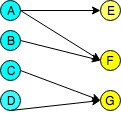

In [ ]:
def isBipartite(graph):
        color = {}
        def dfs(pos):
            for i in graph[pos]:
                if i in color:
                    if color[i] == color[pos]: return False
                else:
                    color[i] = -color[pos]
                    if not dfs(i): return False
            return True
        for i in range(len(graph)):
            if i not in color: color[i] = 1
            if not dfs(i): return False
        return True
print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))


In [ ]:
import collections
def isBipartite(graph):        
    n, colored = len(graph), {}
    for i in range(n):
        if i not in colored :
            colored[i] = 1
            q = collections.deque([i])
            while q:
                cur = q.popleft()
                for nb in graph[cur]:
                    if nb not in colored:
                        colored[nb] = -colored[cur]
                        q.append(nb)
                    elif colored[nb] == colored[cur]:
                        return False
    return True

print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))

## 102. Binary Tree Level Order Traversal
<div class="alert alert-block alert-success">
Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).
</div>
Some level order traversal questions.

* Binary Tree Level Order Traversal
* Binary Tree Level Order Traversal II
* Binary Tree Zigzag Level Order Traversal
* Average of Levels in Binary Tree
* Binary Tree Right Side View
* Find Largest Value in Each Tree Row
* Populating Next Right Pointers in Each Node



In [ ]:
def levelOrder(self, root):
    if not root:
        return []
    queue = [[root]]
    for level in queue:
        lists = []
        for node in level:
            if node.left:
                lists.append(node.left)
            if node.right:
                lists.append(node.right)
        if lists:
            queue.append(lists)
    return [[x.val for x in level] for level in queue]


In [ ]:
class TreeNode:
    def __init__(self, x):
            self.val = x
            self.left = None
            self.right = None

def levelOrder(root):
    res = []
    if not root:
        return res
    dfs(res,root,1)
    return res;
        
def dfs(res, node, level):
    if not node:
        return
    cur = []
    if level > len(res): # reach new level
        res.append([node.val])
    else:
        res[level-1].extend([node.val])
    self.dfs(res,node.left, level+1)
    self.dfs(res,node.right,level+1)

Given a binary tree, return the bottom-up level order traversal of its nodes' values. (ie, from left to right, level by level from leaf to root).

In [ ]:
def levelOrderBottom(self, root):
    stack = [(root,0)]
    res =[]
    while stack:
        node,level = stack.pop()
        if node:
            if level +1 > len(res):
                res.insert(0,[])
            res[-(level+1)].append(node.val)
            stack.append()

## 114. Flatten Binary Tree to Linked List
<div class="alert alert-block alert-success">
Given a binary tree, flatten it to a linked list in-place.

For example, given the following tree:

    1 
   / \ 
  2   5 
 / \   \ 
3   4   6 

The flattened tree should look like:

     1 
      \ 
       2 
        \ 
         3 
          \ 
           4 
            \ 
             5 
              \ 
               6 
</div>

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.data,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.data)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def flatten1(self,root):
    def helper(root):
        if not root:
            return None
        helper(root.left)
        helper(root.right)

        root.right = self.prev
        root.left = None
        self.prev = root
    self.prev = TreeNode(0)
    helper(root)
    
def flatten_dfs_iter(root):
    last = TreeNode(-1)
    stack = [root]
    while stack:
        node = stack.pop()
        last.right = node
        last.left =None
        
        if node and node.right:
            stack.append(node.right)
        if node and node.left:
            stack.append(node.left)
        last = node
        
tree1 = TreeNode(1,TreeNode(2,TreeNode(3),TreeNode(4)),TreeNode(5,None,TreeNode(6)))
print(str(tree1))
#flatten_dfs_iter(tree1)
self.flatten1(tree1)
print(str(tree1))

## 450. Delete Node in a BST
<div class="alert alert-block alert-success">
Given a root node reference of a BST and a key, delete the node with the given key in the BST. Return the root node reference (possibly updated) of the BST.

Note: Time complexity should be O(height of tree).

root = [5,3,6,2,4,null,7]

key = 3

    5
   / \
  3   6
 / \   \
2   4   7

Given key to delete is 3. So we find the node with value 3 and delete it.

One valid answer is [5,4,6,2,null,null,7], shown in the following BST.

    5 
   / \ 
  4   6 
 /     \ 
2       7 

Another valid answer is [5,2,6,null,4,null,7].


    5 
   / \
  2   6 
   \   \ 
    4   7 
</div>
**Approach 1**: Recursive

1. Recursively find the node that has the same value as the key, while setting the left/right nodes equal to the returned subtree
1. Once the node is found, have to handle the below 4 cases
- node doesn't have left or right - return null
- node only has left subtree- return the left subtree
- node only has right subtree- return the right subtree
- node has both left and right - find the minimum value in the right subtree, set that value to the currently found node, then recursively delete the minimum value in the right subtree

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def deleteNode(root, key):
    def findMin(node):
        while node.left:
            node = node.left
        return node

    if not root:
        return root

    if key < root.val: # find the node in the left subtree
        root.left = deleteNode(root.left,key)
    elif key > root.val: # find the node in the right subtree
        root.right = deleteNode(root.right,key)
    else: # found, start to delete it
        if not root.left: # if no right child
            return root.right
        if not root.right: # if no left child, 
            return root.left
        # if node have both righ and left child, delete min node in right subtree
        minNode = findMin(root.right)
        root.val = minNode.val
        root.right = deleteNode(root.right,root.val)
    return root

tree = TreeNode(5,TreeNode(3,TreeNode(2),TreeNode(4)),TreeNode(6,None,TreeNode(7)))
print(str(tree))
deleteNode(tree, 3)
print(str(tree))

## 701. Insert into a Binary Search Tree
<div class="alert alert-block alert-success">
Given the root node of a binary search tree (BST) and a value to be inserted into the tree, insert the value into the BST. Return the root node of the BST after the insertion. It is guaranteed that the new value does not exist in the original BST.

Note that there may exist multiple valid ways for the insertion, as long as the tree remains a BST after insertion. You can return any of them.

Given the tree:

        4
       / \
      2   7
     / \
    1   3
And the value to insert: 5
</div>

In [ ]:
def insertIntoBST(self, root, val):
    if not root:
        return TreeNode(val)
    else:
        if root.val > val:
            root.left = self.insertIntoBST(root.left,val)
        else:
            root.right = self.insertIntoBST(root.right,val)
    return root


def insertIntoBST_iter(self, root, val):
    current = root
    while True:
        if current.val < val: # go right
            if not current.right: # No right subtree 
                current.right = TreeNode(val)
                break
            current = current.right
        else:
            if not current.left: 
                current.left = TreeNode(val)
                break
            current = current.left

    return root

## 108. Convert Sorted Array to Binary Search Tree

<div class="alert alert-block alert-success">
Given an array where elements are sorted in ascending order, convert it to a height balanced BST.

For this problem, a height-balanced binary tree is defined as a binary tree in which the depth of the two subtrees of every node never differ by more than 1.

Example:

Given the sorted array: [-10,-3,0,5,9],

One possible answer is: [0,-3,9,-10,null,5], which represents the following height balanced BST:

          0 
         / \ 
       -3   9 
       /   / 
     -10  5 

</div>
For a sorted array, the left half will be in the left subtree, middle value as the root, right half in the right subtree. This holds through for every node. Many of the approaches here suggest slicing an array recursively and passing them. However, slicing the array is expensive. It is better to pass the left and right bounds into recursive calls instead.

## 109. Convert Sorted List to Binary Search Tree
**Approach 1:** convert sorted List to Array, then do convert array to BST. This approach is a classic example of the time-space tradeoff: you can get the time complexity down by using more space.
**Aproach 2:** Since we are given a linked list and not an array, we don't really have access to the elements of the list using indexes. We want to know the middle element of the linked list.

We can use the two pointer approach for finding out the middle element of a linked list

Once we have the middle element of the linked list, we disconnect the portion of the list to the left of the middle element. The way we do this is by move fast 1 node ahead

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"
class ListNode():
    def __init__(self, data, next=None):
        self.val, self.next = data, next
    def __str__(self):
        string = str(self.val)
        if self.next: string += ',' + str(self.next)
        return string
    
def sortedArray2BST(nums):
    def helper(nums,start,end):
        if start > end:
            return None
        if start == end:
            return TreeNode(nums[start])
        mid  = start + (end-start)//2
        return TreeNode(nums[mid],helper(nums,start,mid-1),helper(nums,mid+1,end))
    return helper(nums,0,len(nums)-1)

def sortedListToBST(head):
    if not head:
        return None # if head not exist, then linkedlist is empty
    if not head.next: 
        return TreeNode(head.val) # just one node
    # find the middle node
    slow,fast = head,head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    
    root = slow.next
    slow.next = None # cut the left
    dummy = TreeNode(root.val,sortedListToBST(head),sortedListToBST(root.next))
    return dummy

#root = sortedArray2BST([-10,-3,0,5,9])
#print(str(root))

l1 = ListNode(-10,ListNode(-3,ListNode(0,ListNode(5,ListNode(9)))))
print(str(l1))
print(str(sortedListToBST(l1)))

## 106. Construct Binary Tree from Inorder and Postorder Traversal
## 105. Construct Binary Tree from Preorder and Inorder Traversal
<div class="alert alert-block alert-success">
Given inorder and postorder traversal of a tree, construct the binary tree.

Note:
You may assume that duplicates do not exist in the tree.

For example, given

inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]
Return the following binary tree:

         3
        / \ 
        9  20 
          /  \ 
        15   7 

      9,     3,    15,   20,    7 
    ..left..root ......right..... 
      9,    15,   7,   20,     3       
    ..left.. ....right.... ..root..  
</div>
**Aproach 1: O(n) time , O(n) space** 
Divide and Conquer

The the basic idea is to take the last element in postorder array as the root, find the position of the root in the inorder array; then locate the range for left sub-tree and right sub-tree and do recursion. Suffers the same problem of being O(n^2) time, O(logn) space due to linear searching for the root value in inorder. Use a HashMap to record the index of root in the inorder array to O(n) time, O(n) space.
inorder: (inorderof left subtree) root ( inorder of right subtree)
postorder: (postorder of left subtree) ( postorder of right subtree) root

**Aproach 2: O(n) time , O(logn) space ** 

After we have taken the first element in Postorder as the root of the tree, there's two options for the next element in the list;

1. There is a right branch, in which case the next element is the root of the right branch
1. There is no right branch, in which case the next element is the root of the left branch
How to decide which case we have? Well consider the impact on inplace in both cases. In case 1. there will be something in inorder before the root element is found, where as the root value will appear immediately if there is no left branch.

Using the knowledge of which case gives the next course of action.

1. Create the right root using the next element in postorder and recurse around.
1. Create the left root using the next element in postorder and recurse around.

The last thing we need to consider is when the we've completed the current branch we're building and when to unroll. That's actually pretty easy to answer, if, as we process the inorder list, we encounter the root value of the parent node, the branch has been completed. Thus we need to simply pass in the root's value each time we recurse around.


The core idea is: Starting from the last element of the postorder and inorder array, we put elements from postorder array to a stack and each one is the right child of the last one until an element in postorder array is equal to the element on the inorder array. Then, we pop as many as elements we can from the stack and decrease the mark in inorder array until the peek() element is not equal to the mark value or the stack is empty. Then, the new element that we are gonna scan from postorder array is the left child of the last element we have popped out from the stack

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"
def buildTree(inorder,postorder):
    if not inorder:
        return None
    root = TreeNode(postorder.pop())
    root_index = inorder.index(root.val)
    root.right = buildTree(inorder[root_index+1:],postorder)
    root.left = buildTree(inorder[:root_index],postorder)
    return root

def buildTree_Map(inorder,postorder):
    def helper(inorder,postorder,start,end,inorderMap):
        if start > end:
            return None
        root = TreeNode(postorder.pop()) # root is the last one in postorder
        index = inorderMap[root.val]
        ## build left and right subtree recursively
        root.right = helper(inorder,postorder,index+1,end,inorderMap)
        root.left = helper(inorder,postorder,start,index-1,inorderMap)
        return root
    
    inorderMap = { inorder[i]: i for i in range(len(inorder))}
    return helper(inorder,postorder,0,len(inorder)-1,inorderMap)
        
def buildTree_Iter(preorder, inorder):
    if not preorder:
        return None
    root = TreeNode(preorder[0])
    stack = [root]
    i,j = 1,0
    while i < len(preorder):
        tmp =None
        cur = TreeNode(preorder[i])
        while stack and stack[-1].val == inorder[j]: # complete subtree
            tmp = stack.pop()
            j +=1
        if tmp:
            tmp.right = cur
        else:
            stack[-1].left = cur

        stack.append(cur)
        i += 1
    return root
print(str(buildTree_Map([9,3,15,20,7],[9,15,7,20,3])))

## 572. Subtree of Another Tree
<div class="alert alert-block alert-success">
Given two non-empty binary trees s and t, check whether tree t has exactly the same structure and node values with a subtree of s. A subtree of s is a tree consists of a node in s and all of this node's descendants. The tree s could also be considered as a subtree of itself.

Given tree s:

          3 
         / \ 
        4   5 
       / \ 
      1   2
 
Given tree t:

       4 
      / \
     1   2
 
Return true, because t has the same structure and node values with a subtree of s.
</div>
**Approach 1** $O(|s|*|t|)$ time . For each node of s, let's check if it's subtree equals t. isMatch(s,t) function check if s and t match at root.val and their subtree match.
**Approach 2** $O(|s|+|t|)$ time. Merkle hashing
For each node in a tree, we can create node.merkle, a hash representing it's subtree.
This hash is formed by hashing the concatenation of the merkle of the left child, the node's value, and the merkle of the right child. Then, two trees are identical if and only if the merkle hash of their roots are equal (except when there is a hash collision.) From there, finding the answer is straightforward: we simply check if any node in s has node.merkle == t.merkle

In [ ]:
def isSubtree(self, s, t):
    def check(s, t):
        if not s and not t:
            return True
        if not s or not t:
            return False
        return (s.val == t.val and check(s.left, t.left) and check(s.right, t.right))

    # need to do a pre-order traversal and do a check
    # for every node we visit for the subtree
    if not s: # return False since None cannot contain a subtree 
        return False
    if check(s, t) or self.isSubtree(s.left, t) or self.isSubtree(s.right, t):
        return True

    return False


def isSubtree(self, s, t):
    tree2id = {}
    id_count = collections.defaultdict(int)

    def getID(root):
        if not root:
            return 0
        tree = (root.val,getID(root.left),getID(root.right))
        if tree in tree2id:
            id = tree2id[tree]
        else:
            id = len(tree2id)+1
            tree2id[tree] = id
        id_count[id] +=1
        return id

    #First hash for t is calculated
    t_id = getID(t)
    # then hash of s
    getID(s)
    # hash collison
    return id_count[t_id] > 1

## 236. Lowest Common Ancestor of a Binary Tree
<div class="alert alert-block alert-success">
![binarytree.png](attachment:binarytree.png)
Input: root = [3,5,1,6,2,0,8,null,null,7,4], p = 5, q = 1

Output: 3

Explanation: The LCA of nodes 5 and 1 is 3.
</div>
**Approach 1** Recursive
Time Complexity: O(n). In the worst case we might be visiting all the nodes of the binary tree.

Space Complexity: O(n). This is because the maximum amount of space utilized by the recursion stack would be N since the height of a skewed binary tree could be N. 

Traverse the tree in a depth first manner. The moment you encounter either of the nodes p or q, return some boolean flag. The flag helps to determine if we found the required nodes in any of the paths

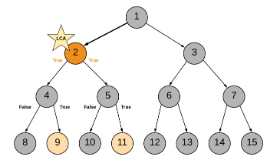

**Approach 2**Iterative using parent pointers
We need to find where is p and q and a way to track their ancestors. If we have parent pointers for each node we can traverse back from p and q to get their ancestors. After we found both p and q, we create a set of p's ancestors. Then we travel through q's ancestors, the first one appears in p's is our answer.

In [ ]:
class TreeNode:
    def __init__(self, x, left = None, right = None):
        self.val,self.left,self.right = x, left,right
    def __str__(self):
        string = "(" + str(self.val)
        if self.left:  string += str(self.left)
        else:          string += "."
        if self.right: string += str(self.right)
        else:          string += "."
        return string + ")"

def lowestCommonAncestor(root, p, q):
    if not root or root is p or root is q:
        return root
    left = lowestCommonAncestor(root.left,p,q)
    right = lowestCommonAncestor(root.right,p,q)

    return root if left and right else left or right

def lowestCommonAncestor_Iter(root, p, q):
    stack = [root]
    parent = {root:None} # keep parent node
    #travel until we find p and q
    while p not in parent or q not in parent:
        node = stack.pop()
        if node.left:
            parent[node.left] = node
            stack.append(node.left)
        if node.right:
            parent[node.right] = node
            stack.append(node.right)
    ancestors = set()
    while p:
        ancestors.add(p)
        p = parent[p]
    while q not in ancestors:
        q = parent[q]
    return q

tree = TreeNode(3,TreeNode(5,TreeNode(6),TreeNode(2,TreeNode(7),TreeNode(4))),TreeNode(1,TreeNode(0),TreeNode(8)))
print(str(tree))
print(lowestCommonAncestor_Iter(tree,5,1))

## 235. Lowest Common Ancestor of a Binary Search Tree
<div class="alert alert-block alert-success">
Given a binary search tree (BST), find the lowest common ancestor (LCA) of two given nodes in the BST.

According to the definition of LCA on Wikipedia: “The lowest common ancestor is defined between two nodes p and q as the lowest node in T that has both p and q as descendants (where we allow a node to be a descendant of itself).”

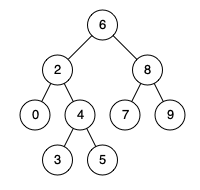
Input: root = [6,2,8,0,4,7,9,null,null,3,5], p = 2, q = 8
Output: 6
Explanation: The LCA of nodes 2 and 8 is 6.
</div>

We can solve this using the approaches to find LCA in a binary tree.

But, binary search tree's property could be utilized, to come up with a better algorithm.
**Aproach 1** Iteractive
Just walk down from the whole tree's root as long as both p and q are in the same subtree (meaning their values are both smaller or both larger than root's). This walks straight from the root to the LCA, not looking at the rest of the tree

In [ ]:
def lowestCommonAncestor(root, p, q):
    if p.val < root.val > q.val:
        return self.lowestCommonAncestor(root.left,p,q)
    elif p.val > root.val < q.val:
        return self.lowestCommonAncestor(root.right,p,q)
    else:
        return root

    
def lowestCommonAncestor(root, p, q):
    while root:
        if p.val < root.val > q.val:
            root = root.left
        elif p.val > root.val < q.val:
            root = root.right
        else:
            return root
        


## 329. Longest Increasing Path in a Matrix
<div class="alert alert-block alert-success">
Given an integer matrix, find the length of the longest increasing path.

From each cell, you can either move to four directions: left, right, up or down. You may NOT move diagonally or move outside of the boundary (i.e. wrap-around is not allowed).

Example 1:

Input: nums = 
<br>
[ <br>
  [9,9,4], <br>
  [6,6,8], <br>
  [2,1,1] <br>
] <br>
Output: 4 
Explanation: The longest increasing path is [1, 2, 6, 9].
</div>
**Approach 1** top-down DP solution.
We can see this problem as a graph problem, in which we have nodes as the matrix elements. There is an edge between node i and node j iff j>i, i and j are in the matrix, and j is a neigbor of i. So a DFS/BFS from every node will solve the problem

1. Do DFS from every cell
1. Compare every 4 direction and skip cells that are out of boundary or smaller
1. Get matrix max from every cell's max
1. Use matrix[x][y] <= matrix[i][j] so we don't need a visited[m][n] array
1. The key is to cache the distance because it's highly possible to revisit a cell

**Approach 2** bottom-up DP solution
Since we are not recursing, we need to build the max length for each node in the matrix by starting from the nodes that have no ingress edge. So we need to do a topsort to process the nodes in the correct way.

But in our case, we know that the nodes having minimum value will not have ingress edges. Consider this matrix:
        
        # M = [[9, 9, 4], [6, 6, 8], [2, 1, 1]]
        # 
        #  The graph will be 
        # 1 ---X  8  X--- 4
        #         X
        #         |    
        # 1 ---X  6 ---X  9
        # |
        # |
        # X
        # 2 ----X 6 ---X  9
        
So the order of exploration in top sort is 1, 1, 2, 4, 6, 6, 8, 9, 9.But this is just the matrix's elements sorted! This simplifies a lot the implementation.


In [ ]:
def longestIncreasingPath(matrix):
    def dfs(i,j):
        if not memo[i][j]:
            #try it's left, right, up and down for smaller number
            res = [1]
            for row,col in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
                if 0<=row<m and 0<=col<n and matrix[i][j]>matrix[row][col]:
                    res.append(1+dfs(row,col))
            memo[i][j] = max(res)
        return memo[i][j]

#     if not matrix or not matrix[0]:
#         return 0
    m,n = len(matrix), len(matrix[0])
    memo = [[0]*n for i in range(m)]
    return max( dfs(x,y) for x in range(m) for y in range(n))

def longestIncreasingPath_v2(matrix):
    #matrix preprocessing and the use of complex numbers eases implementation
    dmatrix = {}
    for r,row in enumerate(matrix):
        for c,val in enumerate(row):
            dmatrix[r + c*1j] = val
    dp,res = {},0
    for z in sorted(dmatrix,key = dmatrix.get):
        max_path = 0
        for i in [z+1, z-1, z+1j, z-1j]:
            if i in dmatrix and dmatrix[z] > dmatrix[i]:
                max_path = max(max_path,dp[i])
        dp[z] = 1+max_path
        res = max(res,dp[z])
    return res

print(longestIncreasingPath([[9,9,4],[6,6,8],[2,1,1]]))

## 111. Minimum Depth of Binary Tree
<div class="alert alert-block alert-success">
Given a binary tree, find its minimum depth.

The minimum depth is the number of nodes along the shortest path from the root node down to the nearest leaf node.

Note: A leaf is a node with no children.

Given binary tree [3,9,20,null,null,15,7],

        3
       / \
      9  20
        /  \
       15   7
return its minimum depth = 2.
</div>

** Approach 1** DFS. O(n) time
** Approach 2** DFS-Iteractive
** Approach 3** BFS-Iteractive
The drawback of the DFS approach in this case is that all nodes should be visited to ensure that the minimum depth would be found. Therefore, this results in a $\mathcal{O}(N)$ complexity. One way to optimize the complexity is to use the BFS strategy. We iterate the tree level by level, and the first leaf we reach corresponds to the minimum depth. As a result, we do not need to iterate all nodes.

In [ ]:
def minDepth(root):
    if not root:
        return 0
    my_deque = collections.deque([(1,root)])
    while my_deque:
        depth,root = my_deque.popleft()
        children = [root.left,root.right]
        #the first leaf we reach corresponds to the minimum depth
        if not any(children): 
            return depth
        for c in children:
            if c:
                my_deque.append((depth+1,c))

                
def minDepth(self, root):
    if not root:
        return 0
    depth = map(self.minDepth,(root.left,root.right))
    return 1 + (min(depth) or max(depth))

## 307. Range Sum Query - Mutable
<div class="alert alert-block alert-success">
Given an integer array nums, find the sum of the elements between indices i and j (i ≤ j), inclusive.

The update(i, val) function modifies nums by updating the element at index i to val.

Given nums = [1, 3, 5]

sumRange(0, 2) -> 9
update(1, 2)
sumRange(0, 2) -> 8
Note:

The array is only modifiable by the update function.
You may assume the number of calls to update and sumRange function is distributed evenly.
</div>

**Approach 3** Segment tree
Segment tree is a very flexible data structure, because it is used to solve numerous range query problems like finding minimum, maximum, sum, greatest common divisor, least common denominator in array in logarithmic time.
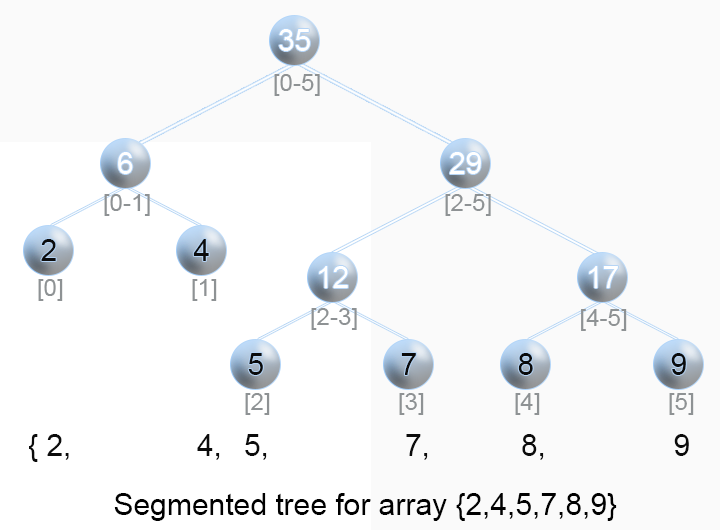

The segment tree for array $a[0, 1, \ldots ,n-1]$  is a binary tree in which each node contains aggregate information (min, max, sum, etc.) for a subrange $[i \ldots j]$ of the array, as its left and right child hold information for range $[i \ldots \frac{i+j}{2}]$ and $[\frac{i + j}{2} + 1, j]$

Segment tree could be implemented using either an array or a tree. For an array implementation, if the element at index ii is not a leaf, its left and right child are stored at index 2i and 2i + 1 respectively.

1. Build segment tree
We will use a very effective bottom-up approach to build segment tree. We already know from the above that if some node pp holds the sum of $[i \ldots j]$ range, its left and right children hold the sum for range $[i \ldots \frac{i + j}{2}]$ and $[\frac{i + j}{2} + 1, j]$ respectively.

Therefore to find the sum of node pp, we need to calculate the sum of its right and left child in advance.

We begin from the leaves, initialize them with input array elements $a[0, 1, \ldots, n-1]$ . Then we move upward to the higher level to calculate the parents' sum till we get to the root of the segment tree.

2. Update segment tree
When we update the array at some index ii we need to rebuild the segment tree, because there are tree nodes which contain the sum of the modified element. Again we will use a bottom-up approach. We update the leaf node that stores a[i]. From there we will follow the path up to the root updating the value of each parent as a sum of its children values.

3. Range Sum Query
We can find range sum query [L, R] using segment tree in the following way:

Algorithm hold loop invariant:

$l \le r $ and sum of $[L \ldots l]$ and $[r \ldots R]$  has been calculated, where l and r are the left and right boundary of calculated sum. Initially we set ll with left leaf L and rr with right leaf R. Range [l,r] shrinks on each iteration till range borders meets after approximately $\log n$  iterations of the algorithm

Loop till l≤r
1. Check if l is right child of its parent P
    1.  l is right child of P. Then P contains sum of range of l and another child which is outside the range [l,r] and we don't need parent P sum. Add l to sumsum without its parent P and set l to point to the right of P on the upper level.
    1.  l is not right child of PP. Then parent PP contains sum of range which lies in [l,r]. Add P to sumsum and set l to point to the parent of P

1. Check if rr is left child of its parent P
    1. r is left child of P. Then P contains sum of range of rr and another child which is outside the range [l,r] and we don't need parent P sum. Add r to sumsum without its parent P and set r to point to the left of P on the upper level.
    1. r is not left child of P. Then parent PP contains sum of range which lies in [l,r]. Add P to sumsum and set r to point to the parent of P
    
    
**Approach 4** BIT- binary index tree


In [ ]:
class TreeNode(object):
    # Segment tree node
    def __init__(self,start,end):
        self.start = start
        self.end = end
        self.total = 0
        self.left = None
        self.right = None
        
        
class NumArray(object):

    def __init__(self, nums):
        # helper func to create segment tree from array
        def createTree(nums,l,r):
            if l>r:
                return None
            if l == r: #leaf node
                node = TreeNode(l,r)
                node.total = nums[l]
                return node
            mid = (l+r)//2
            root = TreeNode(l,r)
            # recursive build segment tree
            root.left = createTree(nums,l,mid)
            root.right = createTree(nums,mid+1,r)
            root.total = root.left.total + root.right.total
            
            return root
        
        self.root = createTree(nums,0,len(nums)-1)
        

    def update(self, i, val):
        # helper function to update val
        def upVal(root,i,val):
            #the actutal value will be update in a leaf
            if root.start == root.end: # leaf node
                root.total = val
                return val
            mid = (root.start+root.end)//2
            
            if i <= mid: #the leaf is in the left subtree
                upVal(root.left,i,val)
            else:
                upVal(root.right,i,val)
            # propogate the changes after recursive call return
            root.total = root.left.total + root.right.total
            return root.total
        
        return upVal(self.root,i,val)

    def sumRange(self, i, j):
        # helper function to calculate range sum
        def sumRange(root,i,j):
            #if the range exactly matches the root, we have the sum
            if root.start == i and root.end == j:
                return root.total
            mid = (root.start+root.end)//2

            #if the end of search range < mid, the entire interval is in the left subtree
            if j <= mid:
                return sumRange(root.left,i,j)
            # interval lies in the right subtree
            elif i >= mid+1: 
                return sumRange(root.right,i,j)
            else: # the interval is split
                return sumRange(root.left,i,mid)+sumRange(root.right,mid+1,j)
        
        return sumRange(self.root,i,j)

In [ ]:
class BinaryIndexTree(object):
    def __init__(self,n):
        self.sums = [0]*(n+1)
        
    def update(self,i,val):
        while i < len(self.sums):
            self.sums[i] +=val
            # move up right
            i += i&-i # remove the most 1 right bit
    
    def sum(self,i):
        res = 0
        while i:
            res += self.sums[i]
            i -=i&-i
        return res
    
class NumArray(object):
    def __init__(self, nums):
        self.bi_tree = BinaryIndexTree(len(nums))
        self.nums = nums
        for i,x in enumerate(nums):
            self.bi_tree.update(i+1,x)
        
    def update(self, i, val):
        self.bi_tree.update(i+1,val - self.nums[i])
        self.nums[i] = val

    def sumRange(self, i, j):
        return self.bi_tree.sum(j+1) - self.bi_tree.sum(i)


## 207. Course Schedule
<div class="alert alert-block alert-success">
There are a total of n courses you have to take, labeled from 0 to n-1.

Some courses may have prerequisites, for example to take course 0 you have to first take course 1, which is expressed as a pair: [0,1]

Given the total number of courses and a list of prerequisite pairs, is it possible for you to finish all courses?

Input: 2, [[1,0]] 

Output: true

Explanation: There are a total of 2 courses to take. To take course 1 you should have finished course 0. So it is possible.

Input: 2, [[1,0],[0,1]]

Output: false

Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.
</div>

This problem is equivalent to finding if a cycle exists in a directed graph. If a cycle exists, no topological ordering exists and therefore it will be impossible to take all courses.

**Topology sort** :or topological ordering of a directed graph is a linear ordering of its vertices such that for every directed edge uv from vertex u to vertex v, u comes before v in the ordering. For instance, the vertices of the graph may represent tasks to be performed, and the edges may represent constraints that one task must be performed before another; in this application, a topological ordering is just a valid sequence for the tasks. A topological ordering is possible if and only if the graph has no directed cycles, that is, if it is a directed acyclic graph (DAG). Any DAG has at least one topological ordering, and algorithms are known for constructing a topological ordering of any DAG in linear time.
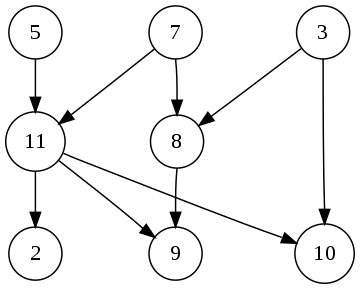

The graph shown to the left has many valid topological sorts, including:
5, 7, 3, 11, 8, 2, 9, 10 (visual left-to-right, top-to-bottom)
3, 5, 7, 8, 11, 2, 9, 10 (smallest-numbered available vertex first)
5, 7, 3, 8, 11, 10, 9, 2 (fewest edges first)
7, 5, 11, 3, 10, 8, 9, 2 (largest-numbered available vertex first)
5, 7, 11, 2, 3, 8, 9, 10 (attempting top-to-bottom, left-to-right)
3, 7, 8, 5, 11, 10, 2, 9 (arbitrary)

One of these algorithms, first described by Kahn (1962), works by choosing vertices in the same order as the eventual topological sort. First, find a list of "start nodes" which have no incoming edges and insert them into a set S; at least one such node must exist in a non-empty acyclic graph. Then:
   
    L ← Empty list that will contain the sorted elements
    S ← Set of all nodes with no incoming edge
    while S is non-empty do
        remove a node n from S
        add n to tail of L
        for each node m with an edge e from n to m do
            remove edge e from the graph
        if m has no other incoming edges then
            insert m into S
    if graph has edges then
        return error   (graph has at least one cycle)
    else 
        return L   (a topologically sorted order)


**Approach 1:BFS**

BFS uses the indegrees of each node. We will first try to find a node with 0 indegree. If we fail to do so, there must be a cycle in the graph and we return false. Otherwise we have found one. We set its indegree to be -1 to prevent from visiting it again and reduce the indegrees of all its neighbors by 1. This process will be repeated for n (number of nodes) times. If we have not returned false, we will return true.

**Approach 2- DFS**

The algorithm loops through each node of the graph, in an arbitrary order, initiating a depth-first search that terminates when it hits any node that has already been visited since the beginning of the topological sort or the node has no outgoing edges (i.e. a leaf node):
    
    L ← Empty list that will contain the sorted nodes
    while there are unmarked nodes do
        select an unmarked node n
        visit(n) 


     function visit(node n)
        if n has a permanent mark then return
        if n has a temporary mark then stop   (not a DAG)
        mark n temporarily
        for each node m with an edge from n to m do
            visit(m)
        mark n permanently
        add n to head of L

Each node n gets prepended to the output list L only after considering all other nodes which depend on n (all descendants of n in the graph). Specifically, when the algorithm adds node n, we are guaranteed that all nodes which depend on n are already in the output list L: they were added to L either by the recursive call to visit() which ended before the call to visit n, or by a call to visit() which started even before the call to visit n. Since each edge and node is visited once, the algorithm runs in linear time

In [2]:
def canFinish_BFS(numCourses, prerequisites):
    #BFS: from the end to the front
    forward = {i: set() for i in range(numCourses)}
    backward = collections.defaultdict(set)
    for i,j in prerequisites:
        forward[i].add(j)
        backward[j].add(i)

    queue = collections.deque([node for node in forward if len(forward[node]) == 0]) 
    while queue:
        node = queue.popleft()
        for neighbor in backward[node]:
            forward[neighbor].remove(node)
            if len(forward[neighbor]) == 0:
                queue.append(neighbor)
        forward.pop(node)
    return not forward # if there is cycle, forward won't be None


def canFinish_DFS(numCourses, prerequisites):
    forward = {i:set() for i in range(numCourses)}
    backward = collections.defaultdict(set)
    for i,j in prerequisites:
        forward[i].add(j)
        backward[j].add(i)

    stack = [ node for node in range(numCourses) if not backward[node]]
    while stack:
        node = stack.pop()
        for neighbor in forward[node]:
            backward[neighbor].remove(node)
            if not backward[neighbor]:
                stack.append(neighbor)

        backward.pop(node)

    return not backward

import collections
def canFinish_DFS_rec(numCourses, prerequisites):
    preCourses = collections.defaultdict(list)
    for course,pre_course in prerequisites:
        preCourses[course].append(pre_course)
    seen, in_stack = set(),set()

    def circle(seen,in_stack,v):
        seen.add(v)
        in_stack.add(v)
        for neighbor in preCourses[v]:
            if neighbor not in seen:
                if circle(seen,in_stack,neighbor):
                    return True
            else:
                if neighbor in in_stack: # check cycle
                    return True
        in_stack.discard(v)
        return False

    for i,j in prerequisites:
        if j not in seen:
            if circle(seen,in_stack,j):
                return False
    return len(seen) <= numCourses

print(canFinish_DFS_rec(2, [[1,0],[0,1]]))

False


## 669. Trim a Binary Search Tree

Given a binary search tree and the lowest and highest boundaries as L and R, trim the tree so that all its elements lies in [L, R] (R >= L). You might need to change the root of the tree, so the result should return the new root of the trimmed binary search tree.
